In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
training_dataset_dim = 5 #Кол-во пар обучающих данных
hidden_units_dim = 10 #Кол-во скрытых единиц
x0=np.random.uniform(low=0.0, high=3.0, size=training_dataset_dim) #Произвольно выбираем точки для обучения
y0 = np.sin(x0) #Находим точное значение функции на training dataset

W1 = np.random.randn(hidden_units_dim) #slope parameter for each input
W2 = np.random.randn(hidden_units_dim) #slope parameter for each hidden units

b1 = np.random.randn(hidden_units_dim) #Offset
b2 = np.random.randn(1) #Offset (final function)


In [ ]:
def ReLU(z):
  return np.maximum(0,z)

def derivative_ReLU_ckal(t):
  if t >= 0:
    return 1
  else:
      return 0

derivative_ReLU = np.vectorize(derivative_ReLU_ckal)

def Loss(pred, y0): #Функция потерь
  return np.dot((pred - y0),(pred - y0))

8.188605907720323


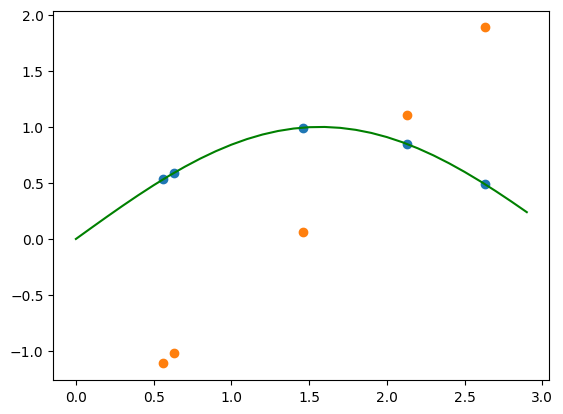

In [ ]:
t = np.random.randn(training_dataset_dim,hidden_units_dim) # Не придумала, как по другому корректно инициализировать матрицу определённой размерности

#Ход вперёд (вычисляем prediction)
for i in range(training_dataset_dim):
  t[i] = x0[i]*W1 + b1
h = ReLU(t)
y1 = W2 @ (h.T) + b2

error1 = Loss(y1, y0)
print(error1)
#Изобразим полученное предсказание с произвольными параметрами
k = np.arange(0,3, 0.1)
sin = np.sin(k)
plt.plot(k,sin,'g')
plt.scatter(x0, y0)
plt.scatter(x0, y1)
plt.show()

7.619761462515498e-06


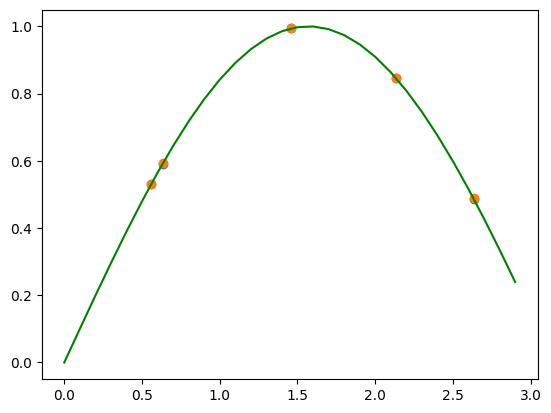

In [ ]:
a = 0.005 #Скорость обучения
#error0 = 0

for j in range(10000):
  #Считаем градиент по всем обучаемым параметрам
  Loss_W2 = 2*(y1-y0) @ h
  Loss_b2 = 2*np.sum((y1-y0))
  Loss_b1 = np.random.randn(hidden_units_dim)
  for i in range(hidden_units_dim):
    derivative_h = derivative_ReLU(t[:, i])
    Loss_b1[i] = np.dot(2*W2[i]*(y1-y0),derivative_h)

  Loss_W1 = np.random.randn(hidden_units_dim)
  for i in range(hidden_units_dim):
    derivative_h = derivative_ReLU(t[:, i])
    Loss_W1[i] = np.dot(2*W2[i]*(y1-y0)*x0,derivative_h)

  #Градиентный спуск
  W1 = W1 - a*Loss_W1
  W2 = W2 - a*Loss_W2
  b1 = b1 - a*Loss_b1
  b2 = b2 - a*Loss_b2

  #Ход перед
  for i in range(training_dataset_dim):
    t[i] = x0[i]*W1 + b1
  h = ReLU(t)
  y1 = W2 @ (h.T) + b2

#Вычисляем функцию потерь
error0 = error1
error1 = Loss(y1, y0)
print(error1)

#Изображаем наше приближение
k = np.arange(0,3, 0.1)
sin = np.sin(k)
plt.plot(k,sin,'g')
plt.scatter(x0, y0)
plt.scatter(x0, y1)
plt.show()

In [ ]:
# a = 0.06 #Скорость обучения

# #Считаем градиент по всем обучаемым параметрам
# Loss_W2 = 2*(y1-y0) @ h
# Loss_b2 = 2*np.sum((y1-y0))
# Loss_b1 = np.random.randn(hidden_units_dim)
# for i in range(hidden_units_dim):
#   derivative_h = derivative_ReLU(t[:, i])
#   Loss_b1[i] = np.dot(2*W2[i]*(y1-y0),derivative_h)

# Loss_W1 = np.random.randn(hidden_units_dim)
# for i in range(hidden_units_dim):
#   derivative_h = derivative_ReLU(t[:, i])
#   Loss_W1[i] = np.dot(2*W2[i]*(y1-y0)*x0,derivative_h)

# #Градиентный спуск
# W1 = W1 - a*Loss_W1
# W2 = W2 - a*Loss_W2
# b1 = b1 - a*Loss_b1
# b2 = b2 - a*Loss_b2

# #Ход перед
# for i in range(training_dataset_dim):
#   t[i] = x0[i]*W1 + b1
# h = ReLU(t)
# y1 = W2 @ (h.T) + b2

# #Вычисляем функцию потерь
# error = Loss(y1, y0)
# print(error)

# #Изображаем наше приближение
# k = np.arange(0,3, 0.1)
# sin = np.sin(k)
# plt.plot(k,sin,'g')
# plt.scatter(x0, y0)
# plt.scatter(x0, y1)
# plt.show()

[0.02253599]


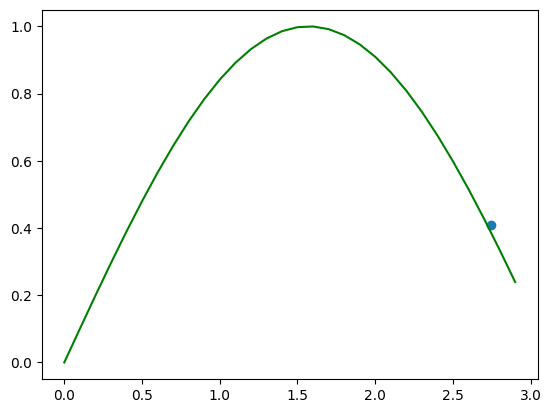

In [ ]:
x0 = np.random.uniform(low=0.0, high=3.0, size=1) #Произвольный input
t = x0*W1 + b1
h = ReLU(t)
y1 = np.dot(W2, h) + b2
print(y1 - np.sin(x0)) #Выводим ошибку

#Изображаем наше приближение
k = np.arange(0,3, 0.1)
sin = np.sin(k)
plt.plot(k,sin,'g')
plt.scatter(x0, y1)
plt.show()